<a href="https://colab.research.google.com/github/mattdiep15/projects/blob/main/Athlete_Classifier_PracticeProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Overview

This project implements a famous athlete image classifier that can identify and differentiate between these 5 celebrities: Roger Federer, Serena Williams, Maria Sharapova and Virat Kohli based on input photos. The model is trained utlizing computer vision for facial feature detection and machine learning. The application is built to process both uploaded images and base64-encoded inputs.


## Machine Learning Models Used

Support Vector Machine \
Random Forest Classifier \
Logistic Regression


## Python Libraries

**NumPy** - handling arrays \
**OpenCV** - image processing, face and eye detection using Haar cascades\
**Matplotlib/Seaborn** - visualizing data distribution\
**PyWavelets** – for extracting wavelet features from images \
**scikit-learn** - building machine learning pipelines, and tuning parameters\
**joblib** - saving and loading trained models

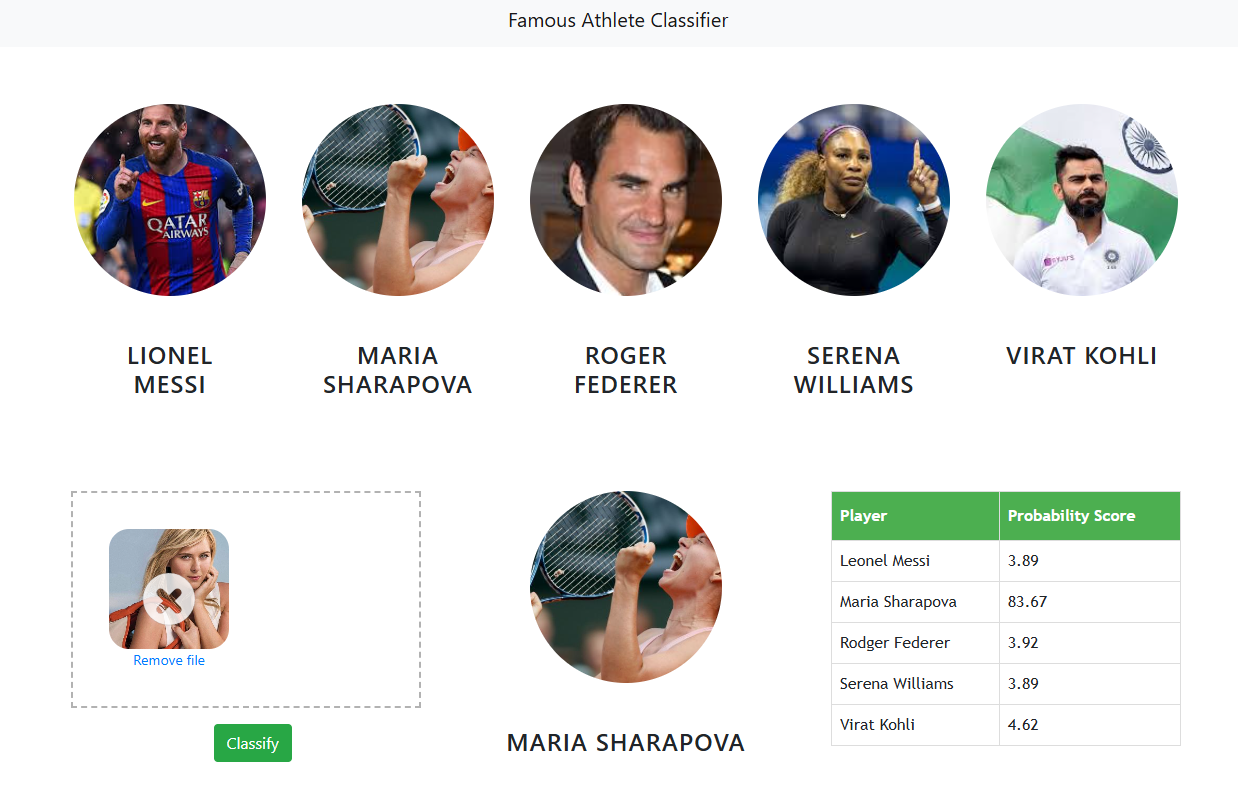

In [ ]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Projects/Image_Classification_Project/CelebrityFaceRecognition/model/test_images/sharapova1.jpg")
img.shape

(555, 700, 3)

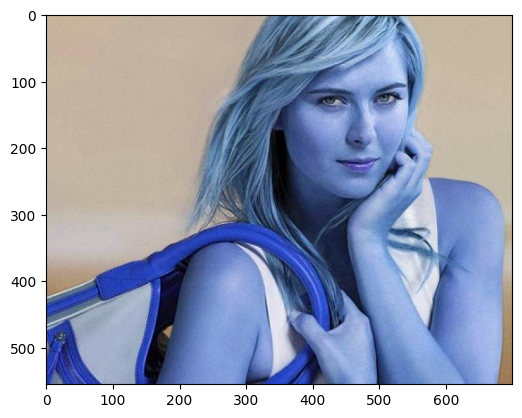

In [ ]:
plt.imshow(img)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

array([[175, 175, 175, ..., 176, 175, 174],
       [175, 175, 175, ..., 177, 175, 174],
       [175, 175, 175, ..., 177, 176, 174],
       ...,
       [ 84,  87,  88, ..., 113, 113, 113],
       [ 88,  89,  90, ..., 113, 113, 113],
       [ 93,  91,  91, ..., 112, 112, 112]], dtype=uint8)
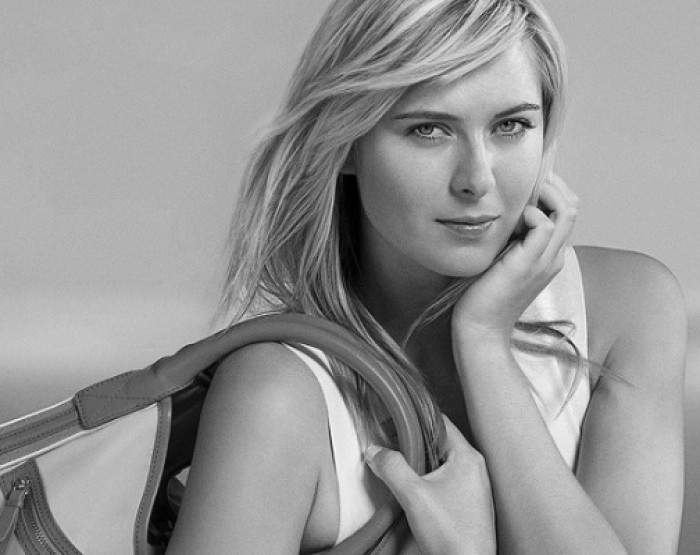

In [ ]:
gray

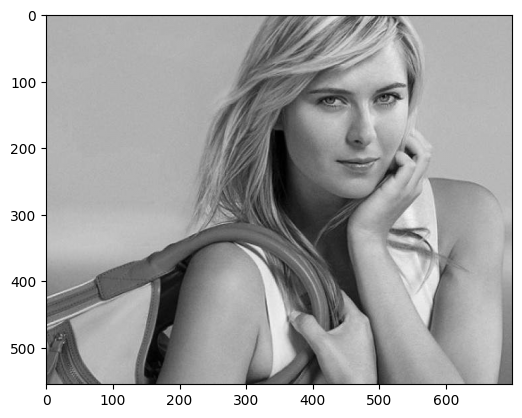

In [ ]:
plt.imshow(gray, cmap='gray')

In [ ]:
# load xml files
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Projects/Image_Classification_Project/CelebrityFaceRecognition/model/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Projects/Image_Classification_Project/CelebrityFaceRecognition/model/opencv/haarcascades/haarcascade_eye.xml')

# detect the face from the image
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[352,  38, 233, 233]], dtype=int32)

In [ ]:
# store the first face into xy and width height variables
(x, y, w, h) = faces[0]
x,y,w,h

(np.int32(352), np.int32(38), np.int32(233), np.int32(233))

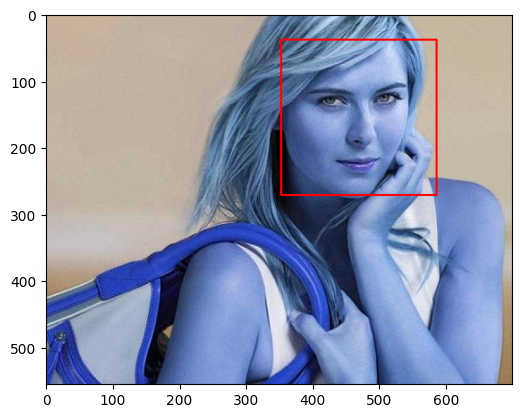

In [ ]:
# draw red rectangle over face using cv
face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0),2)
plt.imshow(face_img)

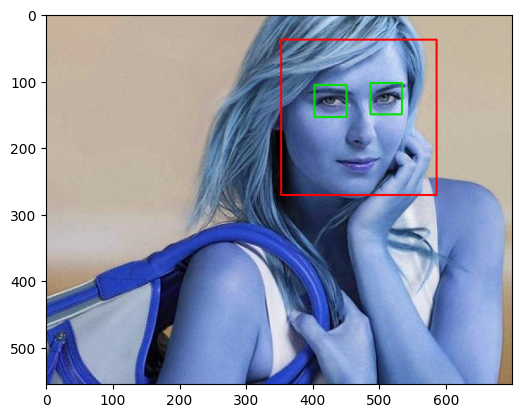

In [ ]:
cv2.destroyAllWindows()
# iterates through the faces
for (x,y,w,h) in faces:
  face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0),2)
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = face_img[y:y+h, x:x+w] # only region of the face roi: region of interest
  eyes = eye_cascade.detectMultiScale(roi_gray)

  # iterates through the eyes and draws a green rectangle
  for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,225,0),2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

In [ ]:
# returns a cropped image only if there are two eyes
def get_cropped_image_if_2_eyes(image_path):
  img = cv2.imread(image_path)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray, 1.3, 5)
  for (x,y,w,h) in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    if len(eyes) >= 2: # checks if 2 eyes
      return roi_color

array([[[ 84, 105, 126],
        [ 66,  86, 104],
        [ 50,  69,  90],
        ...,
        [199, 185, 162],
        [199, 185, 162],
        [199, 185, 162]],

       [[ 73,  93, 111],
        [ 53,  73,  91],
        [ 41,  60,  81],
        ...,
        [199, 185, 162],
        [199, 185, 162],
        [198, 184, 161]],

       [[ 68,  88, 106],
        [ 52,  69,  88],
        [ 45,  64,  85],
        ...,
        [200, 186, 163],
        [200, 186, 163],
        [201, 187, 164]],

       ...,

       [[ 10,   6,  11],
        [  5,   2,   4],
        [  0,   0,   1],
        ...,
        [109, 128, 185],
        [102, 123, 184],
        [105, 127, 193]],

       [[  9,   5,  10],
        [  4,   1,   3],
        [  0,   0,   1],
        ...,
        [110, 130, 185],
        [102, 123, 184],
        [106, 128, 194]],

       [[  8,   4,   9],
        [  2,   0,   1],
        [  0,   0,   1],
        ...,
        [112, 132, 187],
        [101, 122, 183],
        [105, 127, 193]]], dtype=uint8)
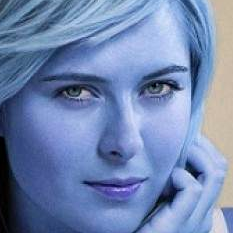

In [ ]:
# image has 2 eyes and will show a cropped image
cropped_image = get_cropped_image_if_2_eyes('/content/drive/MyDrive/Projects/Image_Classification_Project/CelebrityFaceRecognition/model/test_images/sharapova1.jpg')
cropped_image

In [ ]:
# image has 1 eye showing and will not show anything
obstructed_image = get_cropped_image_if_2_eyes('/content/drive/MyDrive/Projects/Image_Classification_Project/CelebrityFaceRecognition/model/test_images/sharapova2.JPG')
obstructed_image

In [ ]:
path_to_data = ('/content/drive/MyDrive/Projects/Image_Classification_Project/CelebrityFaceRecognition/model/dataset/')
path_to_cr_data = ('/content/drive/MyDrive/Projects/Image_Classification_Project/CelebrityFaceRecognition/model/dataset/cropped/')

In [ ]:
import os
img_dirs = []

# paths stored in a list for each player
for entry in os.scandir(path_to_data):
  if entry.is_dir():
    img_dirs.append(entry.path)

In [ ]:
img_dirs

['/content/drive/MyDrive/Projects/Image_Classification_Project/CelebrityFaceRecognition/model/dataset/lionel_messi',
 '/content/drive/MyDrive/Projects/Image_Classification_Project/CelebrityFaceRecognition/model/dataset/maria_sharapova',
 '/content/drive/MyDrive/Projects/Image_Classification_Project/CelebrityFaceRecognition/model/dataset/roger_federer',
 '/content/drive/MyDrive/Projects/Image_Classification_Project/CelebrityFaceRecognition/model/dataset/serena_williams',
 '/content/drive/MyDrive/Projects/Image_Classification_Project/CelebrityFaceRecognition/model/dataset/virat_kohli',
 '/content/drive/MyDrive/Projects/Image_Classification_Project/CelebrityFaceRecognition/model/dataset/cropped']

In [ ]:
import shutil

# if path exists
if os.path.exists(path_to_cr_data):
  shutil.rmtree(path_to_cr_data) # delete entire folder and contents
os.mkdir(path_to_cr_data) # create new folder

In [ ]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1] # splits string into name only
    print(celebrity_name)

    celebrity_file_names_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
      if entry.is_file() and entry.name.lower().endswith(('.png', '.jpg', '.jpeg')):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None: # if two eyes are there
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)

            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name

            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

lionel_messi
Generating cropped images in folder:  /content/drive/MyDrive/Projects/Image_Classification_Project/CelebrityFaceRecognition/model/dataset/cropped/lionel_messi
maria_sharapova
Generating cropped images in folder:  /content/drive/MyDrive/Projects/Image_Classification_Project/CelebrityFaceRecognition/model/dataset/cropped/maria_sharapova
roger_federer
Generating cropped images in folder:  /content/drive/MyDrive/Projects/Image_Classification_Project/CelebrityFaceRecognition/model/dataset/cropped/roger_federer
serena_williams
Generating cropped images in folder:  /content/drive/MyDrive/Projects/Image_Classification_Project/CelebrityFaceRecognition/model/dataset/cropped/serena_williams
virat_kohli
Generating cropped images in folder:  /content/drive/MyDrive/Projects/Image_Classification_Project/CelebrityFaceRecognition/model/dataset/cropped/virat_kohli
cropped


In [ ]:
# this section from stack overflow
# https://stackoverflow.com/questions/24536552/how-to-combine-pywavelet-and-opencv-for-image-processing

import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
  imArray = img

  # convert to grayscale
  imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)

  # convert to float
  imArray = np.float32(imArray)
  imArray /= 255;

  # coefficients
  coeffs = pywt.wavedec2(imArray, mode, level= level)

  # process coeff
  coeffs_H = list(coeffs)
  coeffs_H[0] *= 0;

  imArray_H= pywt.waverec2(coeffs_H, mode);
  imArray_H *= 255
  imArray_H = np.uint8(imArray_H)

  return imArray_H

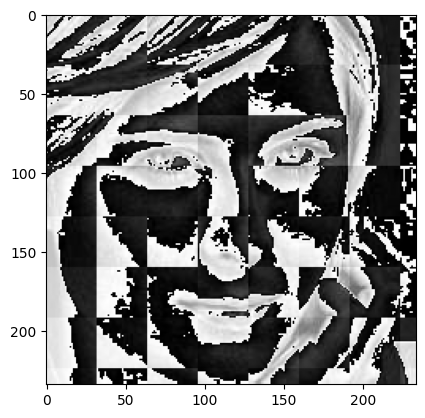

In [ ]:
im_har = w2d(cropped_image, 'db1', 5)
plt.imshow(im_har, cmap='gray')

In [ ]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4,
 'cropped': 5}

In [ ]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
          continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [ ]:
X[0]

array([[184],
       [170],
       [151],
       ...,
       [235],
       [242],
       [233]], dtype=uint8)

In [ ]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(169, 4096)

## Now we start to train our model

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.813953488372093

In [ ]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.75      0.90      0.82        10
           2       1.00      0.75      0.86         4
           3       1.00      0.50      0.67         8
           4       0.81      0.93      0.87        14

    accuracy                           0.81        43
   macro avg       0.86      0.79      0.80        43
weighted avg       0.84      0.81      0.81        43



## Using GridSearch to try out different models with varying parameters

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [ ]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

,model,best_score,best_params
0,svm,0.745846,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.666462,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.753846,{'logisticregression__C': 5}


In [ ]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=5, multi_class='auto',
                                     solver='liblinear'))])}

In [ ]:
best_estimators['svm'].score(X_test,y_test)

0.7906976744186046

In [ ]:
best_estimators['random_forest'].score(X_test,y_test)

0.6976744186046512

In [ ]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.813953488372093

In [ ]:
best_clf = best_estimators['svm']

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 6,  1,  0,  0,  0],
       [ 0, 10,  0,  0,  0],
       [ 0,  1,  3,  0,  0],
       [ 2,  2,  0,  3,  1],
       [ 2,  0,  0,  0, 12]])

Text(95.72222222222221, 0.5, 'Truth')

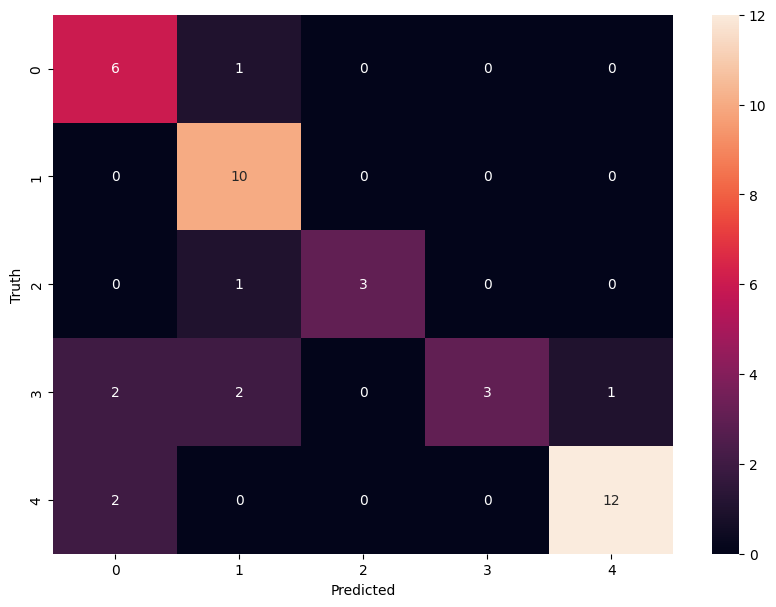

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Saving the Trained Model

In [ ]:
!pip install joblib
import joblib

model_folder = "/content/drive/MyDrive/Projects/Image_Classification_Project/CelebrityFaceRecognition/model"
model_path = os.path.join(model_folder, "saved_model.pkl")

# save model as a pickle in a file
joblib.dump(best_clf, model_path)

['/content/drive/MyDrive/Projects/Image_Classification_Project/CelebrityFaceRecognition/model/saved_model.pkl']

## Saving the Class Dictionary

In [ ]:
import json

json_path = os.path.join(model_folder, "class_dictionary.json")

with open(json_path, "w") as f:
    json.dump(class_dict, f)